# Haptic Response Simulation using Spring-Mass-Damper Model

## Overview
This notebook simulates the **haptic response of different materials** using a **Spring-Mass-Damper (SMD) system**.

We will:
- Model different materials (Rubber, Metal, Foam).
- Solve the motion equation numerically.
- Analyse and plot the **force response curves**.

## Background: Spring-Mass-Damper System
A **Spring-Mass-Damper (SMD)** system follows the equation:

\[
m \ddot{x} + c \dot{x} + k x = F(t)
\]

Where:
- \( m \) = Mass (kg)
- \( c \) = Damping coefficient (Ns/m) (Energy loss due to friction)
- \( k \) = Stiffness (N/m) (How rigid the material is)
- \( x \) = Displacement (m)
- \( F(t) \) = External force applied (N)

Different materials behave differently depending on their **stiffness \( k \) and damping \( c \)**.

## Materials Simulated:
1. **Rubber** - Low stiffness, high damping.
2. **Metal** - High stiffness, low damping.
3. **Foam** - Very low stiffness, very high damping.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# system parameters for different materials
materials = {
    "Rubber": {"m": 1.0, "k": 50, "c": 10},
    "Metal": {"m": 1.0, "k": 500, "c": 5},
    "Foam": {"m": 1.0, "k": 10, "c": 20},
}

# external force (step input)
def force(t):
    return 10 * (t > 1)  # force applied after t=1s

#  diff eq for the SMD system
def smd_system(y, t, m, k, c):
    x, v = y
    dxdt = v
    dvdt = (force(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# time span
t = np.linspace(0, 5, 1000)

# solve for each matrerial
responses = {}
for material, params in materials.items():
    y0 = [0, 0]  # initial conditions (x=0, v=0)
    sol = odeint(smd_system, y0, t, args=(params['m'], params['k'], params['c']))
    responses[material] = sol[:, 0]  # store displacement response


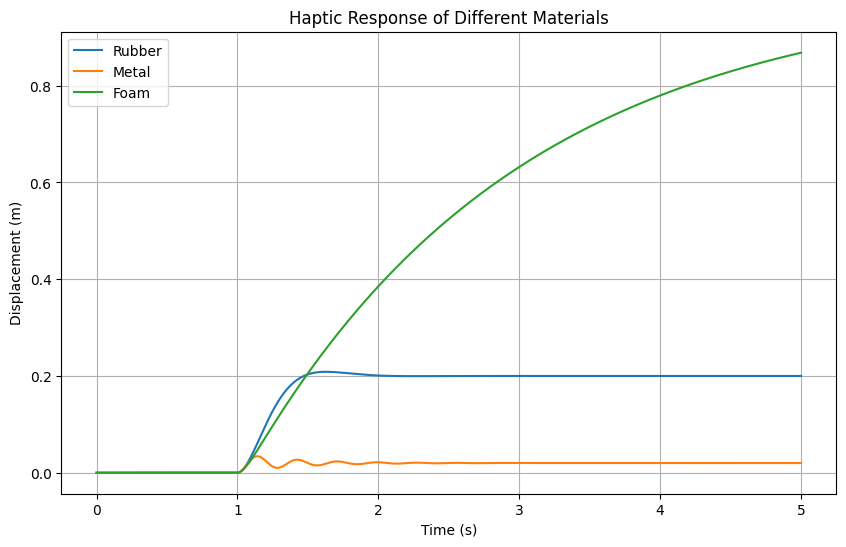

In [4]:
# plot results
plt.figure(figsize=(10, 6))
for material, response in responses.items():
    plt.plot(t, response, label=material)

plt.title('Haptic Response of Different Materials')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid()
plt.show()
